In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest

In [123]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings

### Paso 1: Definición del problema
**Problema**: Los depósitos a largo plazo permiten a los bancos retener dinero durante un período de tiempo específico, lo que permite al banco utilizar ese dinero para mejorar sus inversiones. Las campañas de marketing de este producto se basan en llamadas telefónicas. Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro momento.

**Descripción**: El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

**Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.**

**En este conjunto de datos encontrarás las siguientes variables:**

- age. Edad del cliente (numérico)
- job. Tipo de trabajo (categórico)
- marital. Estado civil (categórico)
- education. Nivel de educación (categórico)
- default. ¿Tiene crédito actualmente? (categórico)
- housing. ¿Tiene un préstamo de vivienda? (categórico)
- loan. ¿Tiene un préstamo personal? (categórico)
- contact. Tipo de comunicación de contacto (categórico)
- month. Último mes en el que se le ha contactado (categórico)
- day_of_week. Último día en el que se le ha contactado (categórico)
- duration. Duración del contacto previo en segundos (numérico)
- campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
- pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
- previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
- poutcome. Resultado de la campaña de marketing anterior (categórico)
- emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
- cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
- cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
- euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
- nr.employed. Número de empleados. Indicador trimestral (numérico)
- y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)

### Paso 2: Recopilación de datos

In [124]:
df = pd.read_csv('/workspaces/GuilloMansa-MachineLearning/data/raw/bank-marketing-campaign-data.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Paso 3: Análisis descriptivo

In [125]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(None, (41188, 21))

In [126]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [127]:
List_cat = df.select_dtypes(include=['object']).columns.tolist()

In [128]:
List_num = df.select_dtypes(include=['float64','int64']).columns.tolist()

In [129]:
List_cat,List_num

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'y'],
 ['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed'])

> ### Observaciones:
>
> - Existen un total de 41188 filas (personas) y 21 columnas, entre las cuales encontramos el target 'Y': ha contrató o no un depósito a largo plazo.
> - No hay valores nulos en ninguna variable.
> - Los datos cuentan con 10 características numéricas y 11 características categóricas.

### Paso 4: Limpieza de datos

In [130]:
df.duplicated().sum() #hay 12 duplicados

np.int64(12)

In [131]:
df.drop_duplicates(inplace=True)

In [132]:
df.drop_duplicates(), df.duplicated().sum()


(       age          job  marital            education  default housing loan  \
 0       56    housemaid  married             basic.4y       no      no   no   
 1       57     services  married          high.school  unknown      no   no   
 2       37     services  married          high.school       no     yes   no   
 3       40       admin.  married             basic.6y       no      no   no   
 4       56     services  married          high.school       no      no  yes   
 ...    ...          ...      ...                  ...      ...     ...  ...   
 41183   73      retired  married  professional.course       no     yes   no   
 41184   46  blue-collar  married  professional.course       no      no   no   
 41185   56      retired  married    university.degree       no     yes   no   
 41186   44   technician  married  professional.course       no      no   no   
 41187   74      retired  married  professional.course       no     yes   no   
 
          contact month day_of_week  .

### Paso 5: Análisis de variables y Paso 6: Ingeniería de características

In [133]:
df['housing'].value_counts(),df['loan'].value_counts(), df['marital'].value_counts(), df['day_of_week'].value_counts()

(housing
 yes        21571
 no         18615
 unknown      990
 Name: count, dtype: int64,
 loan
 no         33938
 yes         6248
 unknown      990
 Name: count, dtype: int64,
 marital
 married     24921
 single      11564
 divorced     4611
 unknown        80
 Name: count, dtype: int64,
 day_of_week
 thu    8618
 mon    8512
 wed    8134
 tue    8086
 fri    7826
 Name: count, dtype: int64)

In [134]:
#Se ve que la variable de días es pareja, lo que parece un dato irrelevante. Se procede a eliminarla.
df.drop(["day_of_week"],axis=1, inplace=True)

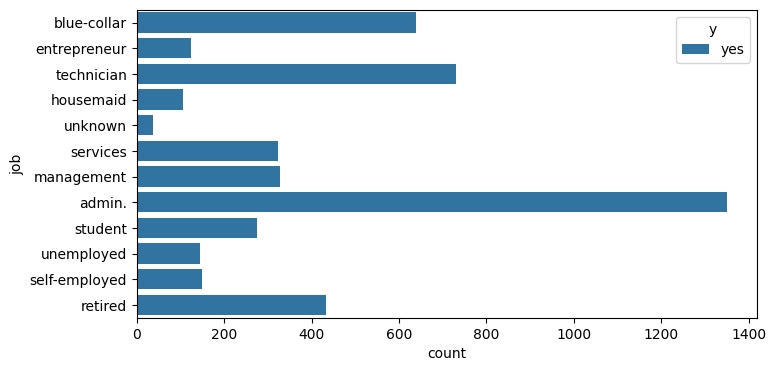

In [135]:
plt.figure(figsize=(8,4))
sns.countplot(data=df[df['y'] == 'yes'], x=None, y='job', hue='y')  
plt.show()

In [136]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.02,10.42,17.00,32.00,38.00,47.00,98.00
duration,41176.0,258.32,259.31,0.00,102.00,180.00,319.00,4918.00
campaign,41176.0,2.57,2.77,1.00,1.00,2.00,3.00,56.00
pdays,41176.0,962.46,186.94,0.00,999.00,999.00,999.00,999.00
previous,41176.0,0.17,0.49,0.00,0.00,0.00,0.00,7.00
emp.var.rate,41176.0,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,41176.0,93.58,0.58,92.20,93.08,93.75,93.99,94.77
cons.conf.idx,41176.0,-40.50,4.63,-50.80,-42.70,-41.80,-36.40,-26.90
euribor3m,41176.0,3.62,1.73,0.63,1.34,4.86,4.96,5.04
nr.employed,41176.0,5167.03,72.25,4963.60,5099.10,5191.00,5228.10,5228.10


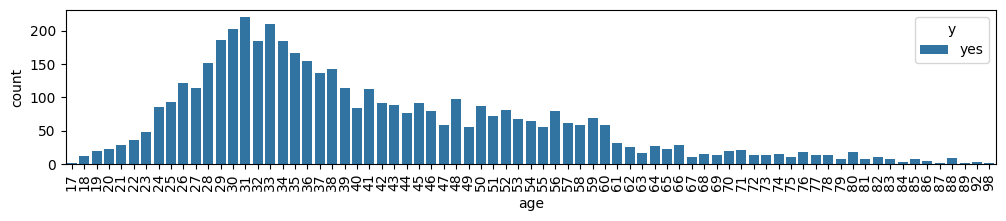

In [137]:
plt.figure(figsize=(12,2))
sns.countplot(data=df[df['y'] == 'yes'], x='age', y=None, hue='y')
plt.xticks(rotation=90)  
plt.show()

In [138]:
df['y_facto'] = pd.factorize(df['y'])[0]
df[['y', 'y_facto']], df['y_facto'].value_counts()

(         y  y_facto
 0       no        0
 1       no        0
 2       no        0
 3       no        0
 4       no        0
 ...    ...      ...
 41183  yes        1
 41184   no        0
 41185   no        0
 41186  yes        1
 41187   no        0
 
 [41176 rows x 2 columns],
 y_facto
 0    36537
 1     4639
 Name: count, dtype: int64)

In [139]:
y_facto_nomenclatura = df.set_index('y')['y_facto'].to_dict()
y_facto_nomenclatura

{'no': 0, 'yes': 1}

#### - Graficos de variables por cantidad:

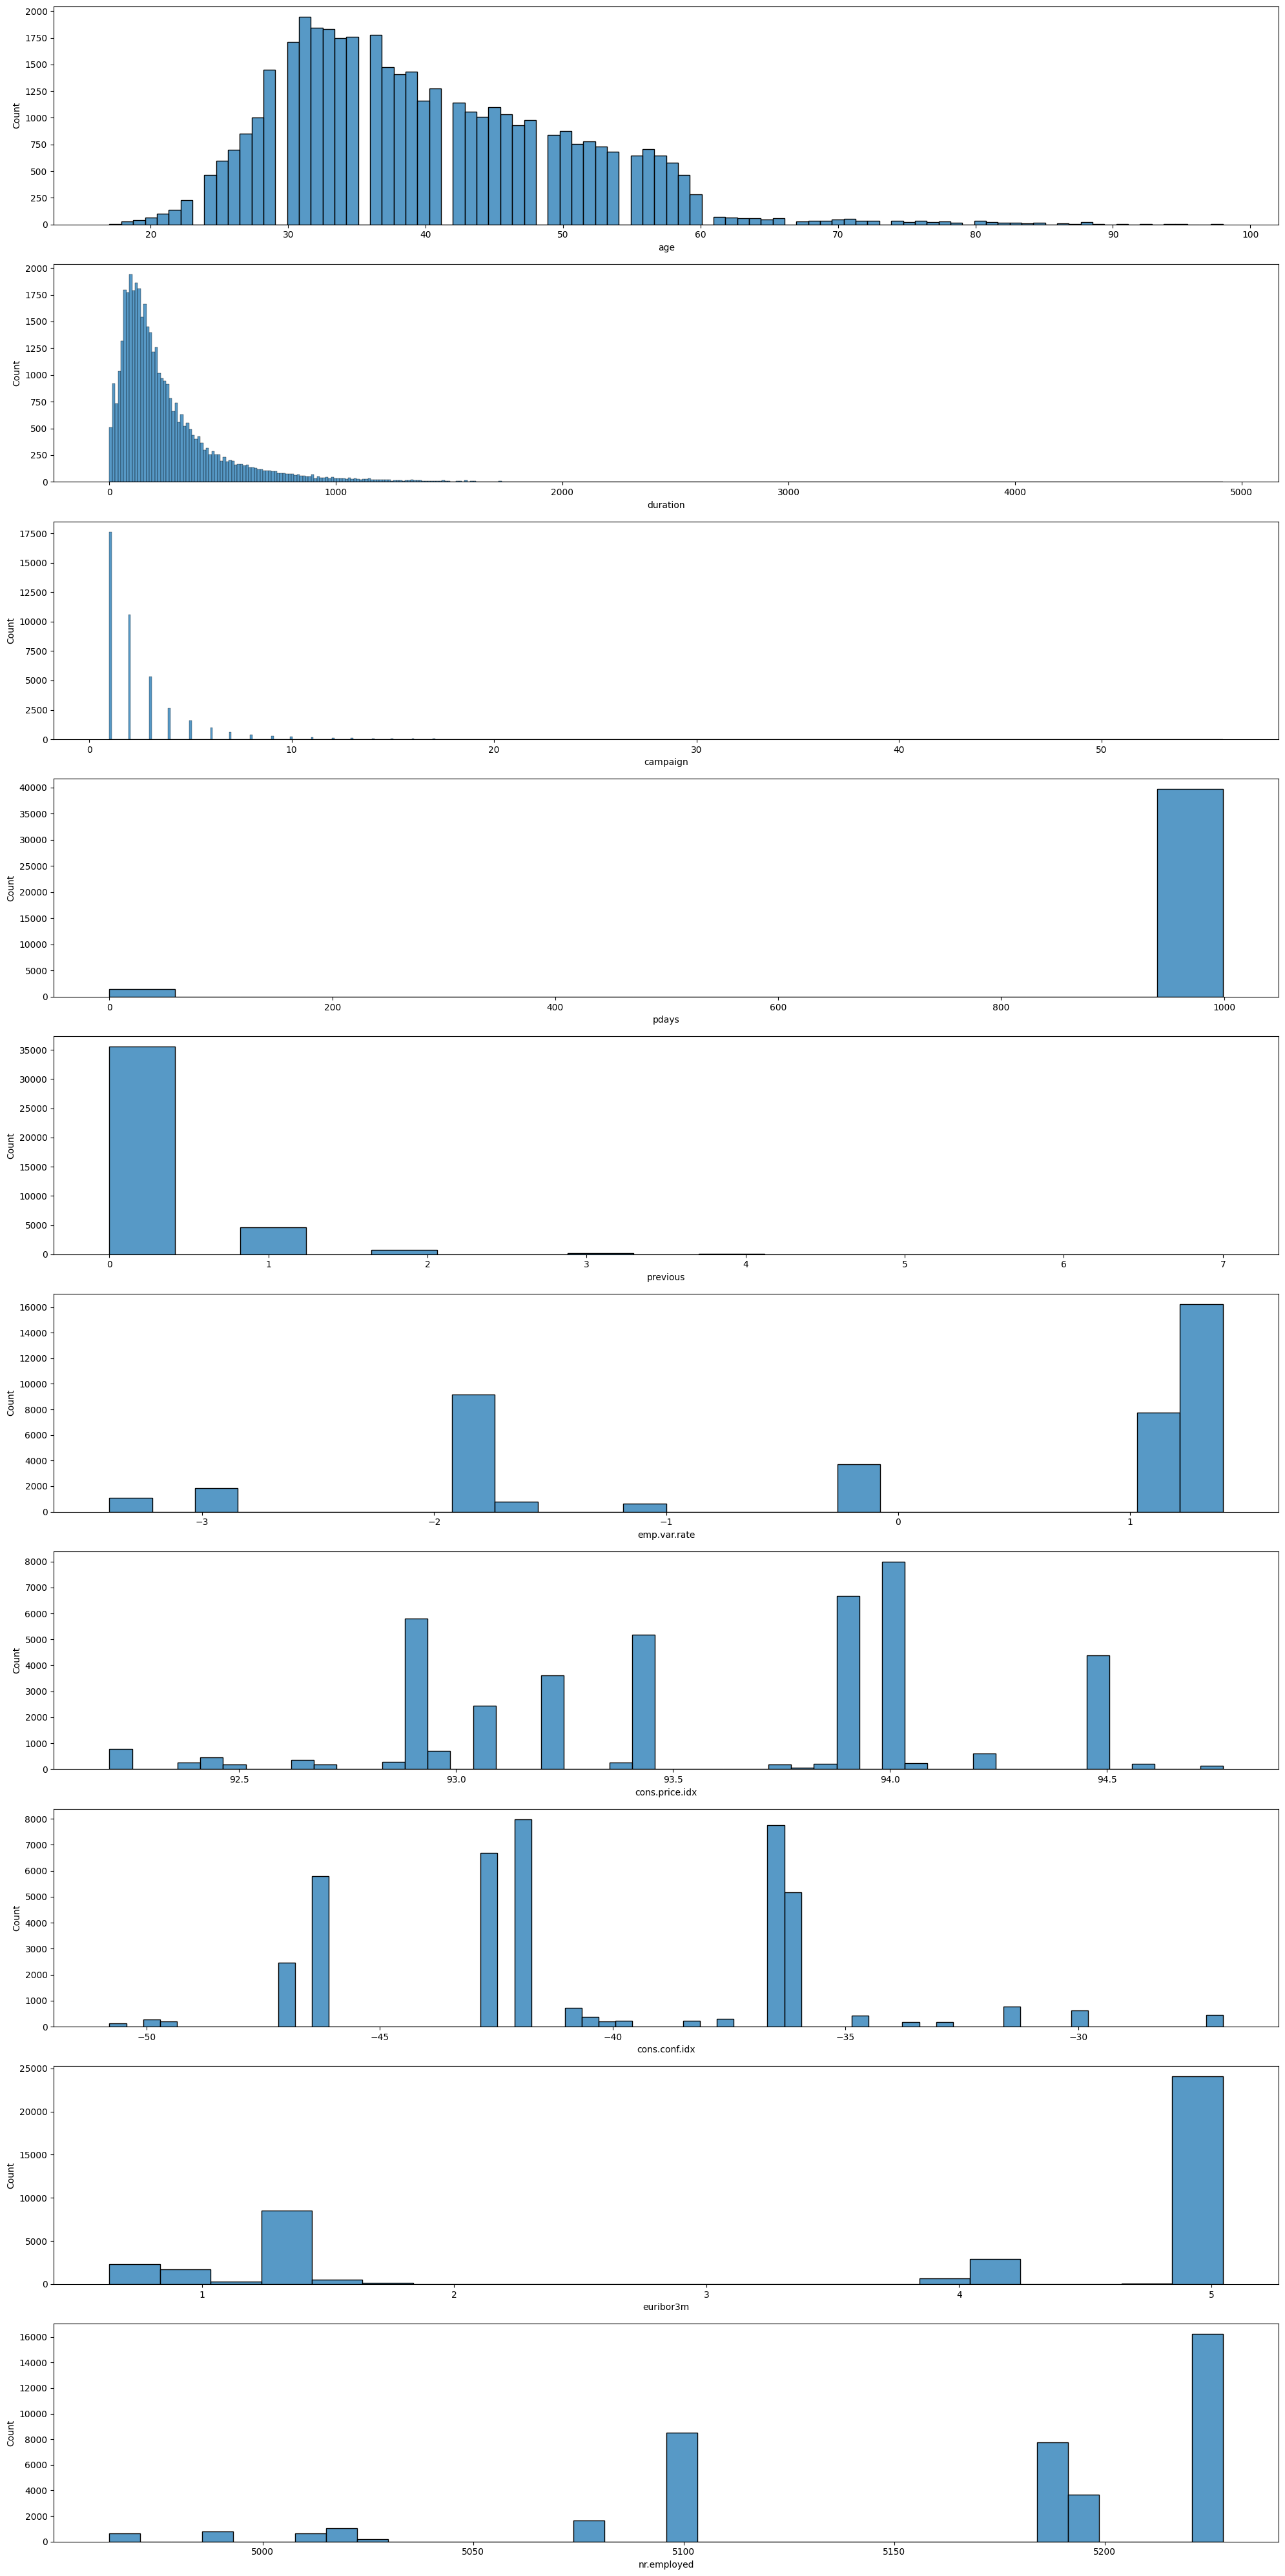

In [140]:
fig, axis = plt.subplots(len(List_num), 1, figsize=(20, 4*len(List_num)))

row = 0
for var in List_num:
    sns.histplot(ax=axis[row], data=df, x=var)
    row += 1

plt.tight_layout()
plt.show()

#### - Observaciones:
- De la var. 'campaign': a la gente se la contacto entre 1 y 5 veces.
- De la var. 'age': la mayor cantidad de clientes estan a partir de los 25 años hasta casi los 50 años.
- De la var. 'previous': a la gran mayoria no se le volvio a contactar.

In [141]:
List_cat_clean = df.select_dtypes(include=['object']).columns.tolist()
List_cat_clean

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

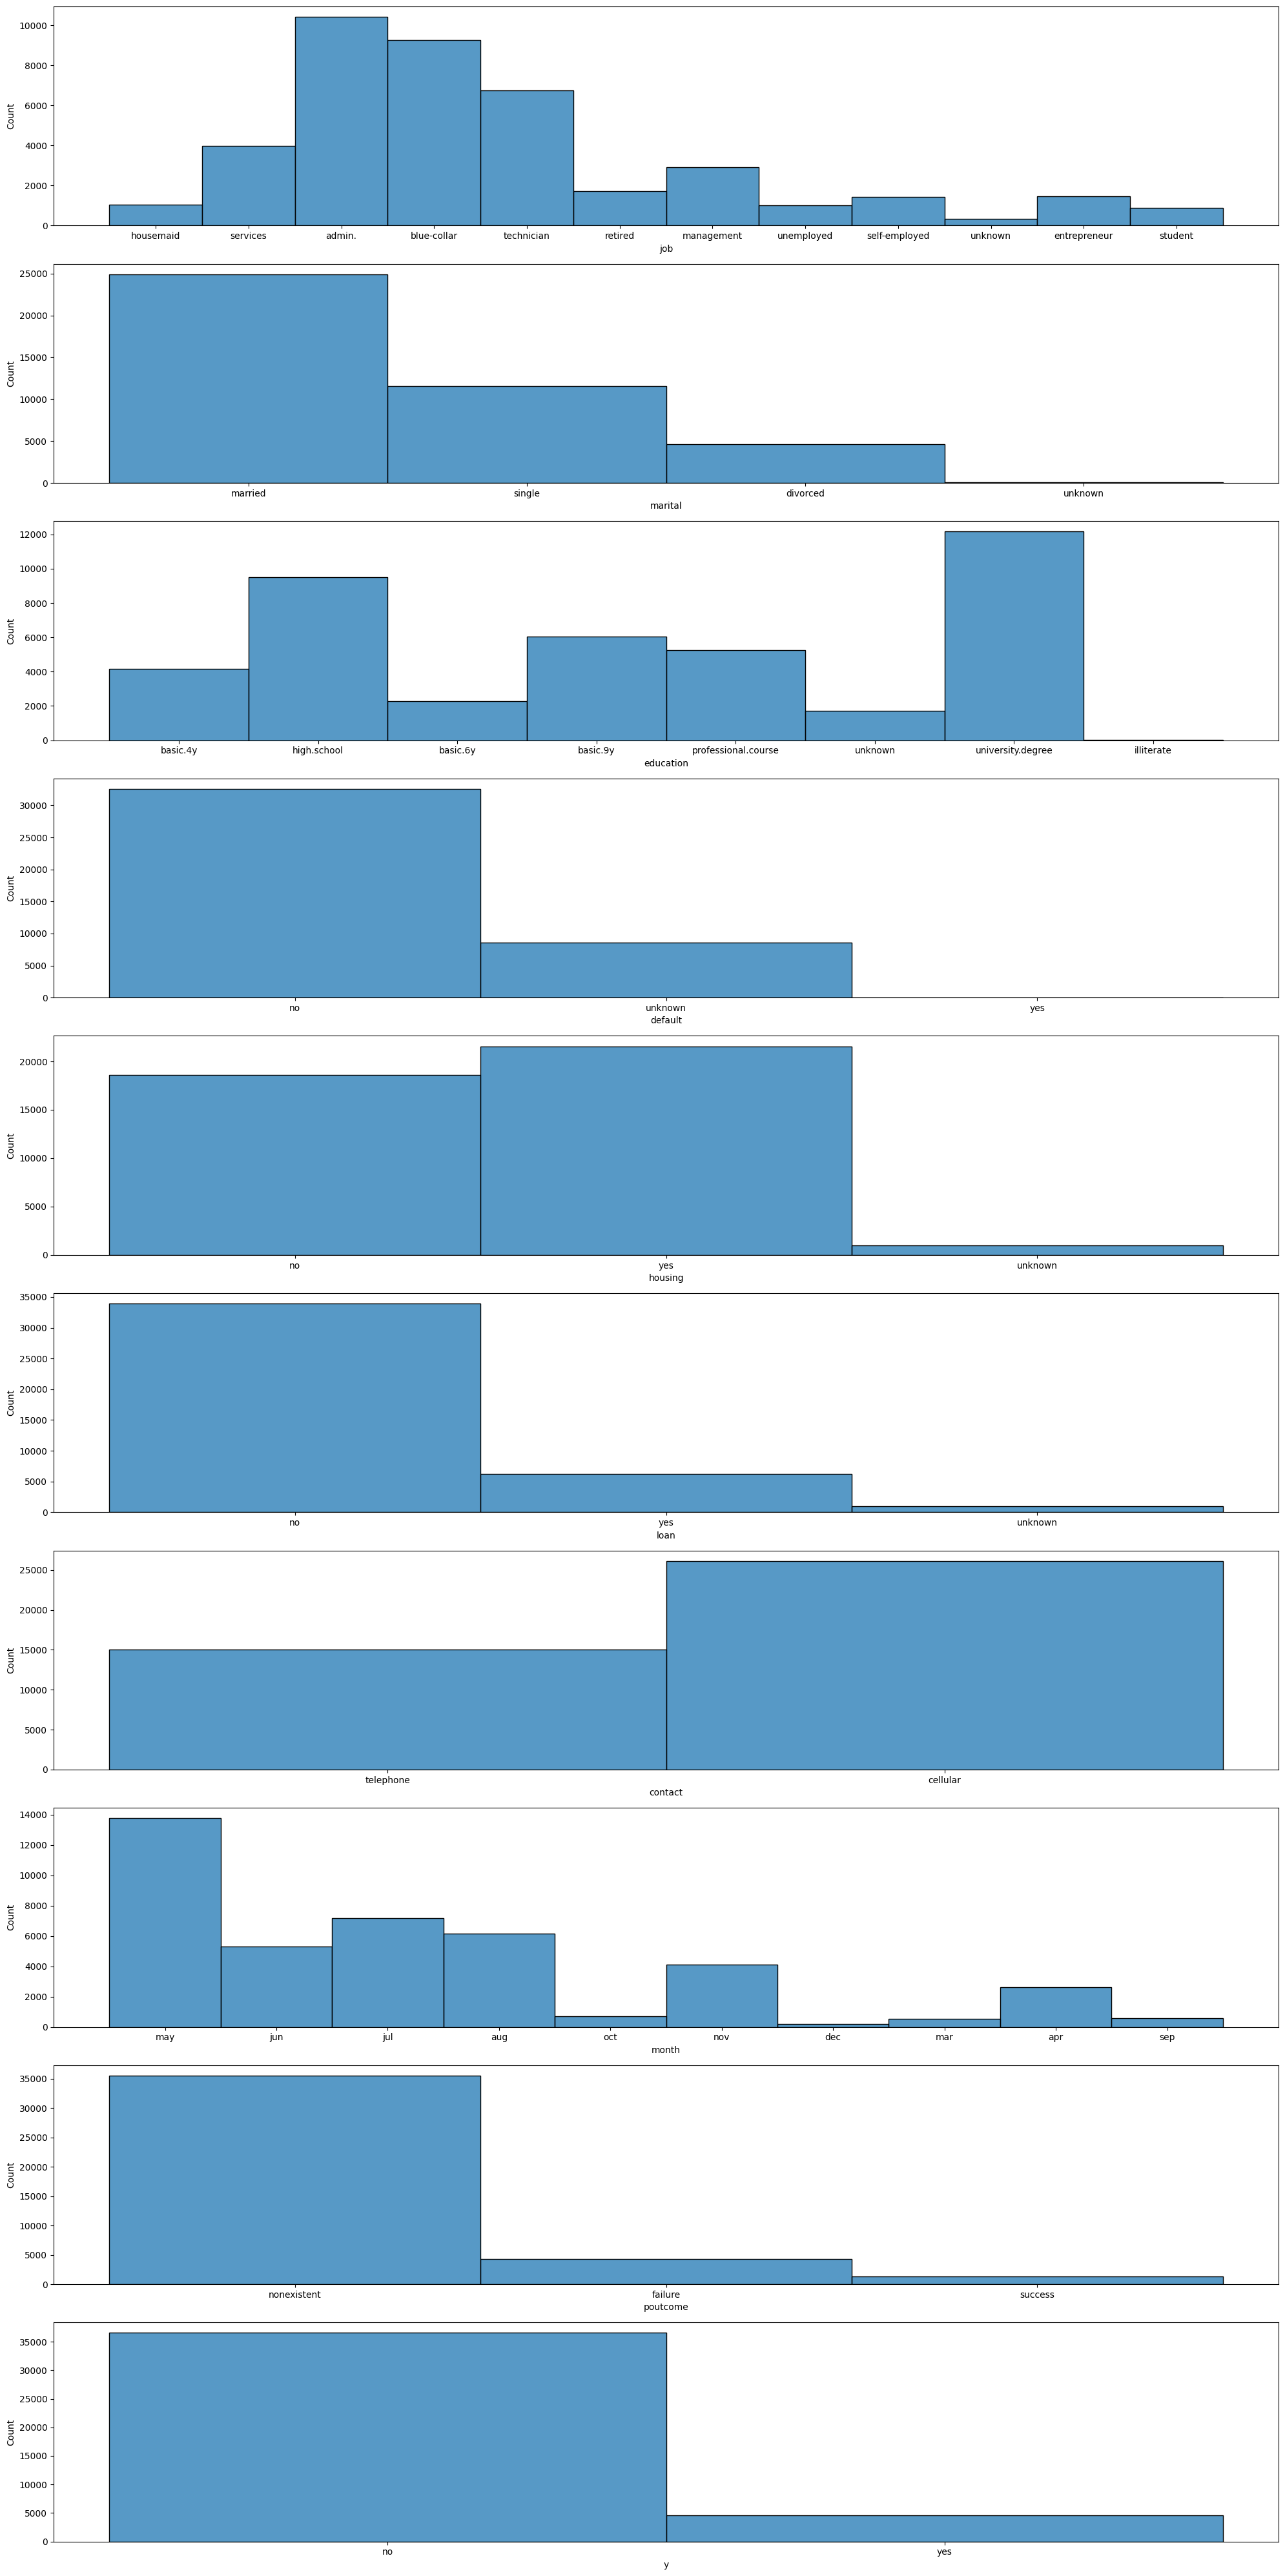

In [142]:
fig, axis = plt.subplots(len(List_cat_clean), 1, figsize=(20, 4*len(List_cat_clean)))
row = 0
for var in List_cat_clean:
    sns.histplot(ax=axis[row], data=df, x=var)
    row += 1
plt.tight_layout()
plt.show()

#### - Observaciones:
- De la var. 'marital': la mayoria de las personas estan casadas.
- De la var. 'job': el trabajo predominante esta compuesto por admin, lo cual mayormente se compone de perfiles administrativos/tecnicos. 
- De la var. 'education': mayormente gente con titulacion universitaria.
- De la var. 'loan': sobresale el 'no'
- De la var. 'month': claramente el mes de may fue el mas cargado y december el menos.
- De las otras variables poco se puede decir, hay pocos datos de la campaña anterior ('poutcome'), la mayoria de la gente fue contactada por movil('contact')

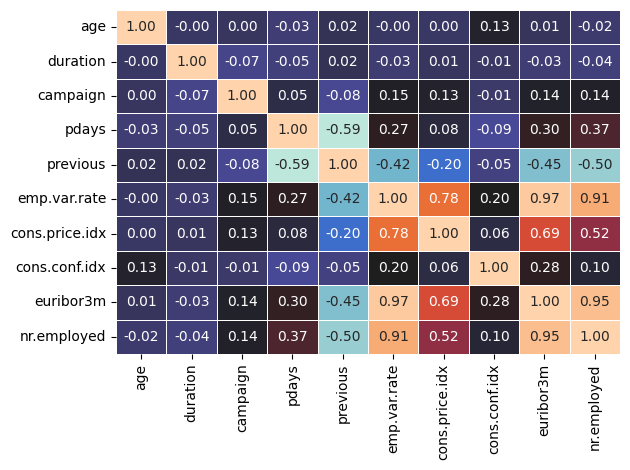

In [143]:
corr_one = df[List_num].corr(numeric_only=True)

sns.heatmap(data=corr_one, annot=True, fmt=".2f", cbar=False, linewidths=0.5, cmap ='icefire')

plt.tight_layout()
plt.show()

#### - De este gráfico damos por justificado eliminar las variables euribor3m y nr.employed al estár con una correlación mayor al 0.90 para continuar con nuestro proceso y optimizar la prediccion.

In [144]:
df.drop(["nr.employed", "euribor3m"],axis=1, inplace=True)

In [145]:
List_num_clean = df.select_dtypes(include=['float64','int64']).columns.tolist()
List_num_clean

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'y_facto']

In [146]:
super_outliners = List_num_clean
q1 = df[super_outliners].quantile(0.25)
q3 = df[super_outliners].quantile(0.75)
iqr = q3 - q1
# se definen limites de estudio para garantizar dejar afuera outliers
lower_limit = (q1 - 1.5 * iqr).clip(lower=0)
upper_limit = q3 + 1.5 * iqr

limites = pd.DataFrame({"Q1": q1.round(2),"Q3": q3.round(2),"IQR": iqr.round(2),"Lower": lower_limit.round(2),"Upper": upper_limit.round(2),})

limites

,Q1,Q3,IQR,Lower,Upper
age,32.00,47.00,15.00,9.5,69.50
duration,102.00,319.00,217.00,0.0,644.50
campaign,1.00,3.00,2.00,0.0,6.00
pdays,999.00,999.00,0.00,999.0,999.00
previous,0.00,0.00,0.00,0.0,0.00
emp.var.rate,-1.80,1.40,3.20,0.0,6.20
cons.price.idx,93.08,93.99,0.92,91.7,95.37
cons.conf.idx,-42.70,-36.40,6.30,0.0,-26.95
y_facto,0.00,0.00,0.00,0.0,0.00


### Paso 7: Split (segundo enfoque)

In [147]:
List_cat_clean

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [148]:
List_cat_clean = df.copy()
df_copy = df.copy()
logistic_regresion_rules = {}

for var in List_cat_clean:
    codes, uniques = pd.factorize(df[var])
    df_copy[var] = codes  
    logistic_regresion_rules[var] = {bat: code for code, bat in enumerate(uniques)}

In [149]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y,y_facto
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,-36.4,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,-36.4,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,-36.4,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,-36.4,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,-36.4,no,0


In [150]:
df.drop(['y_facto'], axis=1, inplace=True)

In [151]:
'''# Dividimos el conjunto de datos en muestras de train y test
X = df_copy.drop("y", axis=1)
y = df_copy["y"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)'''

'# Dividimos el conjunto de datos en muestras de train y test\nX = df_copy.drop("y", axis=1)\ny = df_copy["y"]\n\n# Instancia de: from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X,\n                                                    y,\n                                                    test_size=0.2,\n                                                    random_state=18)'

In [152]:
# Define X (features) and y (target)
X = df.drop(columns = ["y"])
y = df["y"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [153]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
12348,29,entrepreneur,married,basic.6y,no,yes,yes,telephone,jul,286,3,999,0,nonexistent,1.4,93.918,-42.7
8565,50,admin.,single,university.degree,no,no,no,telephone,jun,178,6,999,0,nonexistent,1.4,94.465,-41.8
21424,29,admin.,single,university.degree,no,no,no,cellular,aug,103,4,999,0,nonexistent,1.4,93.444,-36.1
3316,35,admin.,single,university.degree,no,no,no,telephone,may,135,1,999,0,nonexistent,1.1,93.994,-36.4
33246,40,blue-collar,single,high.school,unknown,no,no,cellular,may,418,1,999,0,nonexistent,-1.8,92.893,-46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,34,blue-collar,married,basic.9y,no,no,yes,telephone,may,100,2,999,0,nonexistent,1.1,93.994,-36.4
11285,29,admin.,married,basic.9y,no,yes,no,telephone,jun,120,1,999,0,nonexistent,1.4,94.465,-41.8
38169,71,retired,married,basic.4y,no,no,no,cellular,oct,250,2,999,2,failure,-3.4,92.431,-26.9
860,40,management,married,university.degree,no,yes,no,telephone,may,295,2,999,0,nonexistent,1.1,93.994,-36.4


In [154]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32940, 17), (8236, 17), (32940,), (8236,))

### Paso 8: Scaling y encoding

In [155]:
# Create copies of the training and test sets
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Label Encoder (for ordinal features)
label_encoder = LabelEncoder()
label_encoder.fit(X_train["education"])

X_train_encoded["education_le"] = label_encoder.transform(X_train["education"])
X_test_encoded["education_le"] = label_encoder.transform(X_test["education"])

In [156]:
# One Hot Encoder (for nominal features)
cat_nom = ["job", "marital", "housing", "loan", "month", "poutcome"]

onehot_encoder = OneHotEncoder(sparse_output=False, drop="first")
onehot_encoder.fit(X_train[cat_nom])

X_train_cat_ohe = onehot_encoder.transform(X_train[cat_nom])
X_test_cat_ohe = onehot_encoder.transform(X_test[cat_nom])

# Back to dataframe
X_train_ohe_df = pd.DataFrame(X_train_cat_ohe, index=X_train.index, columns=onehot_encoder.get_feature_names_out(cat_nom))
X_test_ohe_df = pd.DataFrame(X_test_cat_ohe, index=X_test.index, columns=onehot_encoder.get_feature_names_out(cat_nom))

In [157]:
# Dropping original columns
X_train_encoded = X_train_encoded.drop(columns=cat_nom + ["education"])
X_test_encoded = X_test_encoded.drop(columns=cat_nom + ["education"])

# Setting all together
X_train_final = pd.concat([X_train_encoded, X_train_ohe_df], axis=1)
X_test_final = pd.concat([X_test_encoded, X_test_ohe_df], axis=1)

In [158]:
# Select only numeric columns + encoded columns
columns_to_scale = ["age", "duration", "campaign", "previous", "emp.var.rate", "cons.conf.idx"] + [column for column in X_train_final.columns if column.endswith("_le")]

# Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train_final[columns_to_scale])
X_train_scaled = scaler.transform(X_train_final[columns_to_scale])
X_test_scaled  = scaler.transform(X_test_final[columns_to_scale])

# Convert to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns_to_scale)
X_test_scaled_df  = pd.DataFrame(X_test_scaled, columns=columns_to_scale)

X_train_scaled_df.head()

,age,duration,campaign,previous,emp.var.rate,cons.conf.idx,education_le
0,-1.058427,0.112453,0.152155,-0.348601,0.838815,-0.470932,-1.282656
1,0.954767,-0.305973,1.229538,-0.348601,0.838815,-0.276368,1.056055
2,-1.058427,-0.596546,0.511282,-0.348601,0.838815,0.955866,1.056055
3,-0.483229,-0.472568,-0.566100,-0.348601,0.647683,0.891011,1.056055
4,-0.003897,0.623862,-0.566100,-0.348601,-1.199927,-1.227566,-0.347172


In [159]:
norm_scaler = StandardScaler()
num_variables = ["age", "duration", "campaign", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx"]
norm_features = norm_scaler.fit_transform(X_train[num_variables])

df_norm = pd.DataFrame(norm_features,
                        index=X_train.index,
                       columns=num_variables)

X_train[num_variables] = df_norm
X_test[num_variables] = norm_scaler.transform(X_test[num_variables])
df_norm.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx
12348,-1.058427,0.112453,0.152155,-0.348601,0.838815,0.589534,-0.470932
8565,0.954767,-0.305973,1.229538,-0.348601,0.838815,1.534740,-0.276368
21424,-1.058427,-0.596546,0.511282,-0.348601,0.838815,-0.229530,0.955866
3316,-0.483229,-0.472568,-0.566100,-0.348601,0.647683,0.720860,0.891011
33246,-0.003897,0.623862,-0.566100,-0.348601,-1.199927,-1.181648,-1.227566


### Paso 9: Creacion de modelo

In [160]:
# Create the model
model = LogisticRegression(random_state = 18)

# Train the model
model.fit(X_train_scaled_df, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,18
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [161]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled_df)
y_pred

array(['yes', 'no', 'no', ..., 'no', 'no', 'no'],
      shape=(8236,), dtype=object)

In [162]:
# Evaluate accuracy
model_accuracy = accuracy_score(y_test, y_pred)
model_accuracy

0.8957017969888296

- Observations: 

>-Llegamos a una precision de 89.57 %, lo cual está bien para este modelo.

### Paso 10: Matriz de confusion

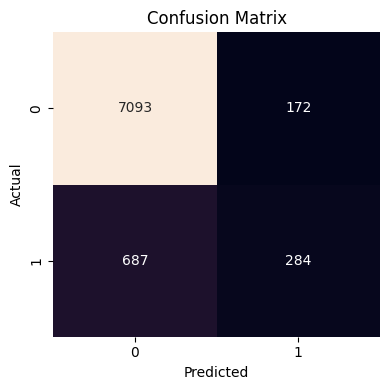

In [163]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)

# Chart
plt.figure(figsize = (4, 4))
sns.heatmap(df_cm, annot = True, fmt = "d", cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()

- Observations: 

>-True Negative (TN) = 7093 → Correctly predicted “no”: verdaderamente negativos

>-False Positive (FP) = 172 → Predicted “yes” but actually “no”

>-False Negative (FN) = 687 → Predicted “no” but actually “yes”

>-True Positive (TP) = 284 → Correctly predicted “yes”

### Paso 11: Hiperparametrizacion

In [164]:
# Define hyperparams manually
hyperparams = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               "penalty": ["l1", "l2", "elasticnet", None],
               "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}


# Initialize the grid search
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)

grid

,estimator,LogisticRegre...ndom_state=18)
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [165]:
# Looking for best parameters
grid.fit(X_train_scaled_df, y_train)

grid.best_params_

{'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}

In [166]:
grid.best_estimator_

,penalty,None
,dual,False
,tol,0.0001
,C,0.001
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,18
,solver,'newton-cg'
,max_iter,100
,multi_class,'deprecated'


In [167]:
# Save the best model found by GridSearchCV
best_model_grid = grid.best_estimator_

# Make predictions on the training set using the optimized model
y_pred_grid = best_model_grid.predict(X_test_scaled_df)

# Calculate the accuracy of the optimized model on the training data
grid_accuracy = accuracy_score(y_test, y_pred_grid)

In [168]:
# Compare the baseline model accuracy with the optimized model accuracy
model_accuracy, grid_accuracy

(0.8957017969888296, 0.8957017969888296)